### Case Study

Many strategies can be highly profitable depending on whether you are in an upward trending, downward trending or oscillating market. However, how can you tell what market you are in and in addition do this without an subjective bias?

Hidden Markov Models allow us to determine any number of states we like, given inputs such as returns and volatility (or any inputs of your choosing), to help ascertain what state - or regime - the market is in. This is part of a type of analysis known as Regime identification.

### Imports

In [3]:

import pandas as pd
import numpy as np

from pyhhmm.gaussian import GaussianHMM
from ta.volatility import AverageTrueRange


import matplotlib.pyplot as plt
import fix_yahoo_finance
import yfinance

### Data Management

In [2]:
# Data Extraction
start_date = "2017-01-1"
end_date = "2022-06-1"
symbol = "SPY"

data = yfinance.download(tickers = "IOC.NS",start="2010-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)



data = data[["Open", "High", "Low", "Close","Volume"]]


[*********************100%***********************]  1 of 1 completed


In [5]:
# Add Returns and Range
df = data.copy()
df["Returns"] = (df["Close"] / df["Close"].shift(1)) - 1
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume,Returns,Range
Date,,,,,,,
2010-03-09,27.425285,27.505267,27.029813,27.140902,2820648,-0.007313,0.017590
2010-03-10,26.980928,27.274201,26.887615,27.176443,2508072,0.001310,0.014378
2010-03-11,27.283088,27.460829,26.798747,27.043140,3387942,-0.004905,0.024706
2010-03-12,27.105348,27.149782,26.847624,26.994261,1900506,-0.001807,0.011255
2010-03-15,27.016477,27.087574,26.216647,26.425493,2753304,-0.021070,0.033220


In [8]:
atr = AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['atr'] = atr.average_true_range()

In [10]:
# Structure Data
X_train = df[["Returns", "atr"]]
X_train.tail()

,Returns,atr
Date,,
2023-07-03,0.043264,1.710533
2023-07-04,-0.006299,1.734781
2023-07-05,0.008980,1.775153
2023-07-06,0.032461,1.884071
2023-07-07,0.006085,1.938781


### HMM Learning

/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]
Correct number of rows:  True


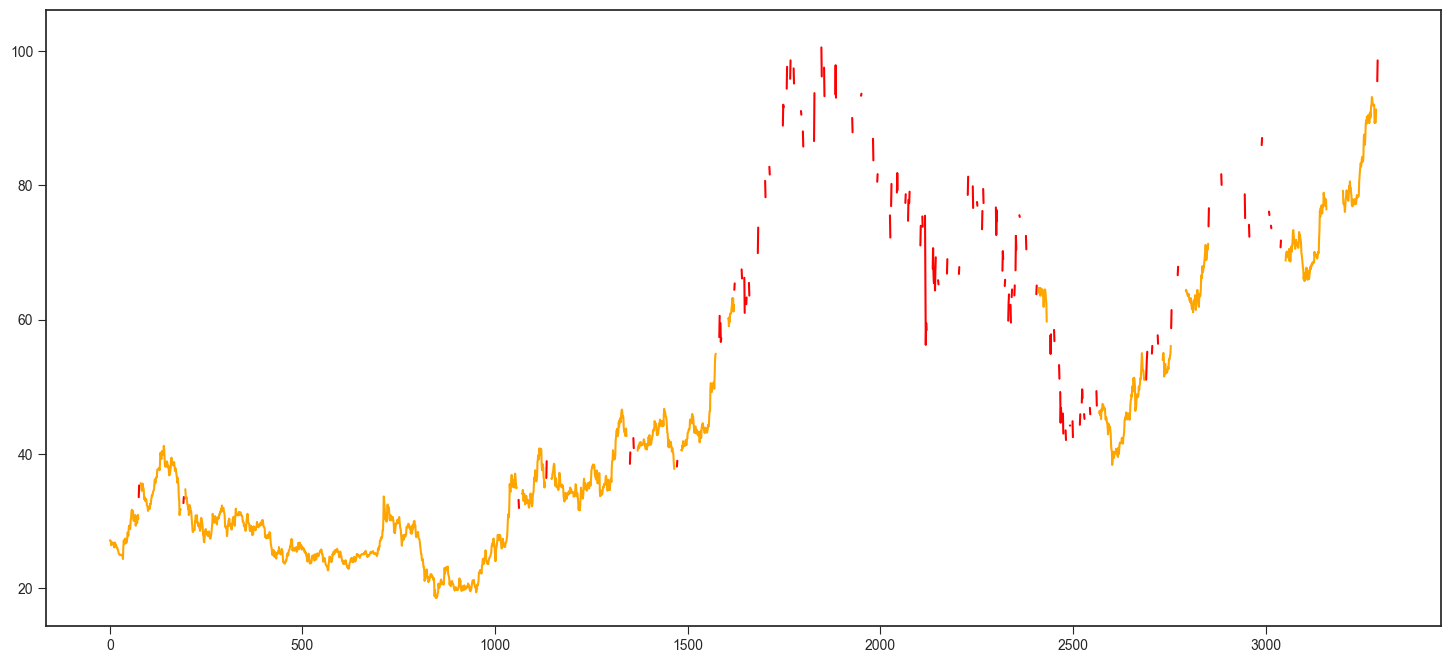

In [12]:
# Train Model
model = GaussianHMM(n_states=3, covariance_type='full', n_emissions=2)
model.train([np.array(X_train.values)])
# Check Results
hidden_states = model.predict([X_train.values])[0]
print(hidden_states[:40])
len(hidden_states)
model.means
model.covars
# Structure the prices for plotting
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = df["Close"].values.astype(float)
print("Correct number of rows: ", len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i += 1
# Plot Chart
fig = plt.figure(figsize= (18, 8))
plt.plot(labels_0, color="green")
plt.plot(labels_1, color="red")
plt.plot(labels_2, color="orange")
plt.plot(labels_3, color="black")
plt.show()

### Data Visualization

### Conclusion

Although work is still yet to be done in the following notebook, we can cleary see from the chart above, that the Hidden Markov Model has been able to identify market regimes based on returns and volatility behaviour.

### Useful Resources

HMM Colab Version with Backtest: https://colab.research.google.com/drive/12qzR8SrhfhQDBImKYQqUKdj6n60E9jNp?usp=sharing